<a href="https://colab.research.google.com/github/AnuradhaRajawat/Zylentrix_Data_Analysis_Project/blob/main/Zylentrix_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analyst Intern Assignment - Zylentrix**
**Introduction :**

Analyze User Engagement on an Online Learning Platform using different Python Libraries like Pandas and Matplotlib.

**Objective :**

Analyze user engagement and provide insights & recommendations.


**1. Import Libraries**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

**3. Data Loading**

In [ ]:
students = pd.read_csv('/content/students.csv')
feedback = pd.read_csv('/content/feedback.csv')
course_activity = pd.read_csv('/content/course_activity.csv')


In [ ]:
students.head()


,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [ ]:
feedback.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [ ]:
course_activity.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


**4. Data Cleaning and Preparation**

In [ ]:
#Merge Data
data = pd.merge(course_activity, feedback,  on=['Student_ID', 'Course_ID'], how='left')
full_data = pd.merge(data, students, on='Student_ID', how='left')


In [ ]:
print(data)

    Student_ID Course_ID        Date  Time_Spent_Minutes  \
0         S001     PY202  05/01/2024                  90   
1         S001     DM101  28/01/2024                 155   
2         S001     UX303  28/01/2024                 177   
3         S002     PY202  03/02/2024                  45   
4         S002     UX303  15/03/2024                 119   
..         ...       ...         ...                 ...   
654       S100     PY202  03/03/2024                  83   
655       S100     UX303  27/02/2024                 168   
656       S100     UX303  02/01/2024                 134   
657       S100     WD404  12/03/2024                 139   
658       S100     WD404  28/03/2024                 135   

     Completion_Percentage  Rating    Feedback_Text  
0                    46.10     NaN              NaN  
1                    88.87     NaN              NaN  
2                    54.93     NaN              NaN  
3                    32.20     3.0  Well structured  
4        

In [ ]:
#Identify Missing Values
print(full_data.isnull().sum())


Student_ID                 0
Course_ID                  0
Date                       0
Time_Spent_Minutes         0
Completion_Percentage      0
Rating                   537
Feedback_Text            537
Name                       0
Age                        0
Gender                     0
Location                   0
Enrolment_Date             0
dtype: int64


In [ ]:
#handling Missing Value
full_data['Rating'].fillna(full_data['Rating'].mean(), inplace=True)
full_data['Feedback_Text'].fillna('No Feedback', inplace=True)


<ipython-input-25-b99a656b7ff9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['Rating'].fillna(full_data['Rating'].mean(), inplace=True)


In [ ]:
print(full_data.isnull().sum())


Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
Rating                   0
Feedback_Text            0
Name                     0
Age                      0
Gender                   0
Location                 0
Enrolment_Date           0
dtype: int64


In [ ]:
# Checking duplicate
duplicates = full_data.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")


Total duplicate rows: 0


In [ ]:
# Check for negative or suspicious time spent
print("Time spent less than 0 minutes:")
print(full_data[full_data['Time_Spent_Minutes'] < 0])

# Check for invalid completion percentage
print("Completion percentage not between 0 and 100:")
print(full_data[(full_data['Completion_Percentage'] < 0) | (full_data['Completion_Percentage'] > 100)])

# Check for invalid ratings (after filling missing)
print("Ratings not between 1 and 5:")
print(full_data[(full_data['Rating'] < 1) | (full_data['Rating'] > 5)])


Time spent less than 0 minutes:
Empty DataFrame
Columns: [Student_ID, Course_ID, Date, Time_Spent_Minutes, Completion_Percentage, Rating, Feedback_Text, Name, Age, Gender, Location, Enrolment_Date]
Index: []
Completion percentage not between 0 and 100:
Empty DataFrame
Columns: [Student_ID, Course_ID, Date, Time_Spent_Minutes, Completion_Percentage, Rating, Feedback_Text, Name, Age, Gender, Location, Enrolment_Date]
Index: []
Ratings not between 1 and 5:
Empty DataFrame
Columns: [Student_ID, Course_ID, Date, Time_Spent_Minutes, Completion_Percentage, Rating, Feedback_Text, Name, Age, Gender, Location, Enrolment_Date]
Index: []


In [ ]:
# Converting Data Types
full_data['Date'] = pd.to_datetime(full_data['Date'], format='%d/%m/%Y')
full_data['Enrolment_Date'] = pd.to_datetime(full_data['Enrolment_Date'])

In [ ]:
# Ensuring numeric fields are correctly typed
full_data['Time_Spent_Minutes'] = pd.to_numeric(full_data['Time_Spent_Minutes'], errors='coerce')
full_data['Completion_Percentage'] = pd.to_numeric(full_data['Completion_Percentage'], errors='coerce')
full_data['Rating'] = pd.to_numeric(full_data['Rating'], errors='coerce')


In [ ]:
# Check for datatypes
print(full_data.dtypes)


Student_ID                       object
Course_ID                        object
Date                     datetime64[ns]
Time_Spent_Minutes                int64
Completion_Percentage           float64
Rating                          float64
Feedback_Text                    object
Name                             object
Age                               int64
Gender                           object
Location                         object
Enrolment_Date           datetime64[ns]
dtype: object


In [ ]:
# Downloading Clean Data
full_data.to_csv('cleaned_data.csv', index=False)
print("Final cleaned data saved successfully!")


Final cleaned data saved successfully!


**5. EDA**



*   What is the overall average completion rate across courses?



In [ ]:
overall_avg_completion = full_data['Completion_Percentage'].mean()
print(f"Overall average Completion Percentage: {overall_avg_completion:.2f}%")


Overall average Completion Percentage: 54.78%




*   Which course has the highest and lowest average engagement time?



In [ ]:
course_engagement = full_data.groupby('Course_ID')['Time_Spent_Minutes'].mean()

highest_course = course_engagement.idxmax()
lowest_course = course_engagement.idxmin()

print(f"Highest engagement course: {highest_course} ({course_engagement.max():.2f} mins)")
print(f"Lowest engagement course: {lowest_course} ({course_engagement.min():.2f} mins)")


Highest engagement course: DM101 (102.43 mins)
Lowest engagement course: PY202 (93.90 mins)




*   How does engagement differ by age group or location?



<ipython-input-45-273061def80c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_engagement = full_data.groupby('Age')['Time_Spent_Minutes'].mean()


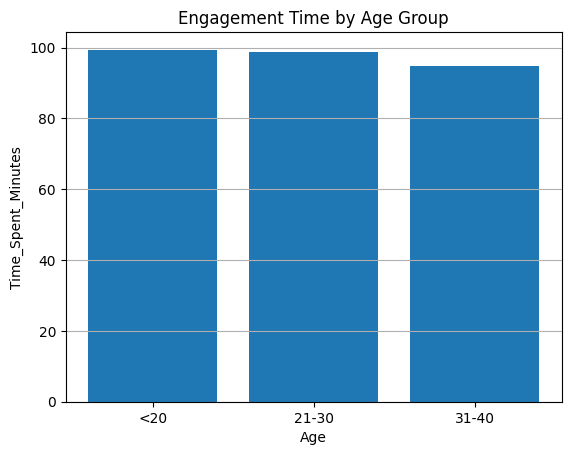

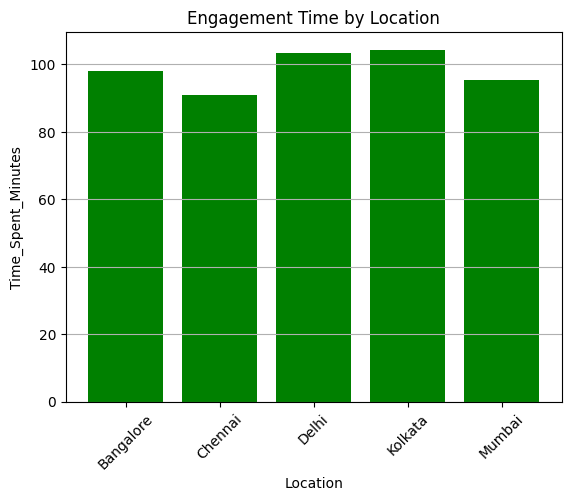

In [ ]:
# Create Age Groups
bins = [0, 20, 30, 40, 100]
labels = ['<20', '21-30', '31-40', '40+']
full_data['Age'] = pd.cut(full_data['Age'], bins=bins, labels=labels)

# Age Group Engagement
age_group_engagement = full_data.groupby('Age')['Time_Spent_Minutes'].mean()
plt.bar(age_group_engagement.index.astype(str), age_group_engagement.values)
plt.title('Engagement Time by Age Group')
plt.xlabel('Age')
plt.ylabel('Time_Spent_Minutes')
plt.grid(axis='y')
plt.show()

# Location Engagement
location_engagement = full_data.groupby('Location')['Time_Spent_Minutes'].mean()
plt.bar(location_engagement.index, location_engagement.values, color='green')
plt.title('Engagement Time by Location')
plt.xlabel('Location')
plt.ylabel('Time_Spent_Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




*   What is the average feedback rating per course?



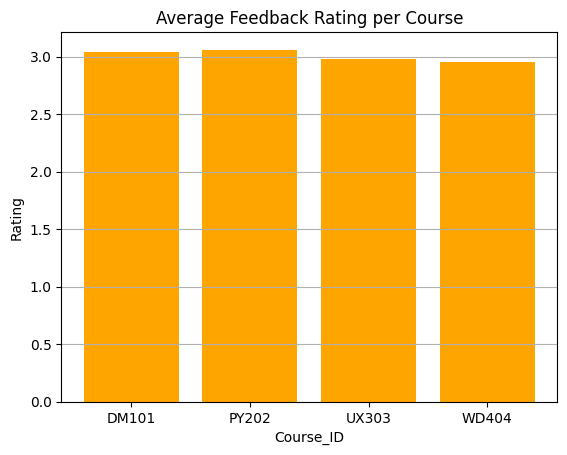

Course_ID
DM101    3.037375
PY202    3.061176
UX303    2.983704
WD404    2.953176
Name: Rating, dtype: float64


In [ ]:
feedback_per_course = full_data.groupby('Course_ID')['Rating'].mean()
plt.bar(feedback_per_course.index, feedback_per_course.values, color='orange')
plt.title('Average Feedback Rating per Course')
plt.xlabel('Course_ID')
plt.ylabel('Rating')
plt.grid(axis='y')
plt.show()

print(feedback_per_course)




*   Is there a correlation between completion rate and feedback rating?



Correlation between Completion Rate and Feedback Rating: -0.02


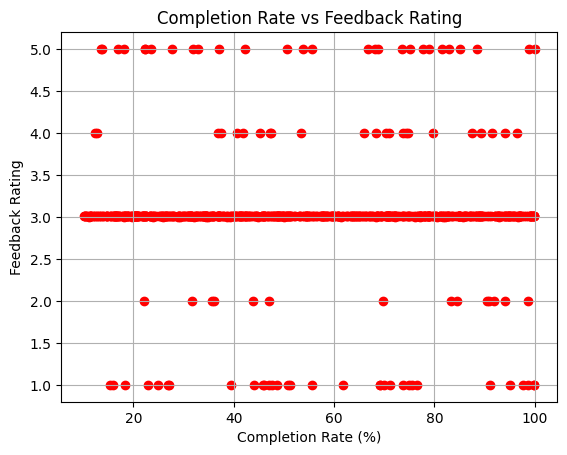

In [ ]:
correlation = full_data['Completion_Percentage'].corr(full_data['Rating'])
print(f"Correlation between Completion Rate and Feedback Rating: {correlation:.2f}")

plt.scatter(full_data['Completion_Percentage'], full_data['Rating'], color='red')
plt.title('Completion Rate vs Feedback Rating')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Feedback Rating')
plt.grid(True)
plt.show()


No, there is no meaningful correlation between Completion Rate and Feedback Rating.





*   Identify top 3 student segments based on engagement and satisfaction?



In [ ]:
# Create engagement-satisfaction score
full_data['score'] = (full_data['Time_Spent_Minutes'] * 0.5) + (full_data['Rating'] * 10)

top_3_students = full_data.sort_values('score', ascending=False).head(3)
print(top_3_students[['Student_ID', 'Course_ID', 'score']])


    Student_ID Course_ID  score
235       S036     DM101  137.5
509       S077     PY202  131.0
326       S049     DM101  131.0


**6. Visualization**



*   Showing engagement patterns by course and demographic



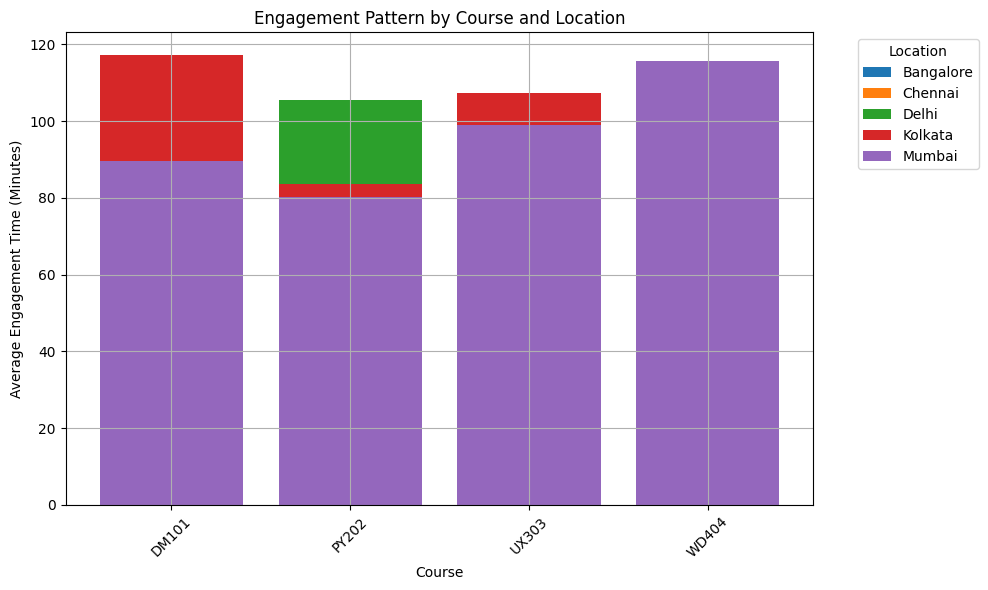

In [ ]:
# Grouping data by Course and Location to calculate average engagement
engagement_location = full_data.groupby(['Course_ID', 'Location'])['Time_Spent_Minutes'].mean().reset_index()

# Plotting the engagement patterns between course and location
plt.figure(figsize=(10, 6))
for location in engagement_location['Location'].unique():
    data = engagement_location[engagement_location['Location'] == location]
    plt.bar(data['Course_ID'], data['Time_Spent_Minutes'], label=location)

plt.title('Engagement Pattern by Course and Location')
plt.xlabel('Course')
plt.ylabel('Average Engagement Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() #Adjustment in layout to avoid overlap
plt.show()




*   Comparing feedback ratings



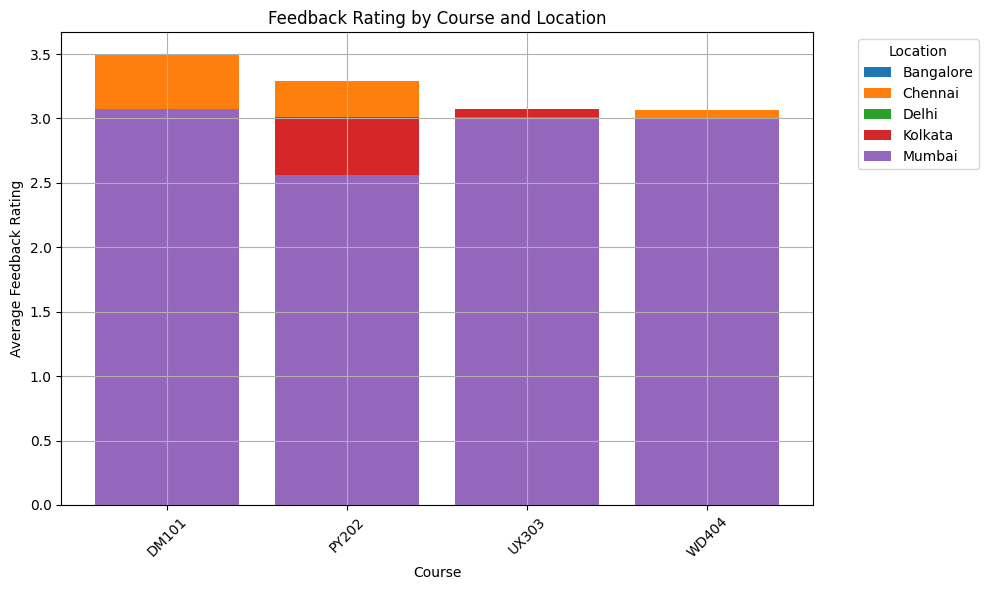

In [ ]:
# Grouping data by Course and Location to calculate average Feedback Rating
feedback_location = full_data.groupby(['Course_ID', 'Location'])['Rating'].mean().reset_index()

# Plot the feedback ratings by course and location
plt.figure(figsize=(10, 6))
for location in feedback_location['Location'].unique():
    data = feedback_location[feedback_location['Location'] == location]
    plt.bar(data['Course_ID'], data['Rating'], label=location)

plt.title('Feedback Rating by Course and Location')
plt.xlabel('Course')
plt.ylabel('Average Feedback Rating')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()




*   Highlighting trends overtime



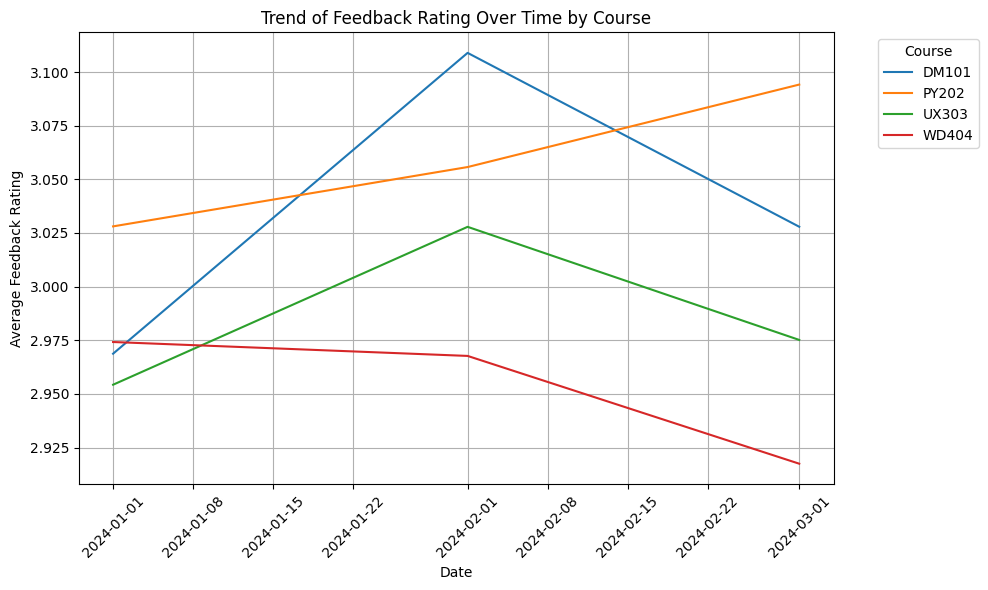

In [ ]:

full_data['Date'] = pd.to_datetime(full_data['Date'])

# Grouping data by Date and Course to calculate average Feedback Rating
feedback_trend = full_data.groupby([full_data['Date'].dt.to_period('M'), 'Course_ID'])['Rating'].mean().reset_index()

# Plotting the trend overtime
plt.figure(figsize=(10, 6))
for course in feedback_trend['Course_ID'].unique():
    course_data = feedback_trend[feedback_trend['Course_ID'] == course]
    plt.plot(course_data['Date'].dt.to_timestamp(), course_data['Rating'], label=course)

plt.title('Trend of Feedback Rating Over Time by Course')
plt.xlabel('Date')
plt.ylabel('Average Feedback Rating')
plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjustment in layout to avoid overlap
plt.show()
